# Regressão aplicada a dados de saturação de água


## Etapa 1: carregamento de dados e pré-processamento
>  Inicialmente irei usar dois tipos de dados: 
> > * Dados1: é com dados calculados do livro do schon, desses dados, temos os perfis de profundidade (depth),  radioatividade (GR), densidade (RHOB), porosidade neutronica (NPHI), resistividade (RES-DEEP), Vsh (VSH), saturação de água (SW) e porosidade de densidade (DPHI-SS), essas ultimas 3 foram calculadas a partir das anteriores e considerando alguns fatores. Dentre os perfis que utilizaremos, o perfil de SW é calculado diretamente da equação de archi com parametros definidos como *Rw=0,03*, *m=1,96* e *n=2,19*
> > * Dados2: é com os dados experimentais e retirados de um poço em Wyoming. Neste, temos dados de profundidade (DEPTH), porosidade sonica (PHI), resistividade (RES) e saturação de água (SW).


> Começaremos fazendo o treinamento da rede através dos dados1

In [148]:
#Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [178]:
# Vamos ler o arquivo csv direto com o pandas
dados1 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados1.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados1,dados2
#dados1=dados1.iloc[21:176,:]
#dados1 = dados1.reset_index(drop = True)

(      DEPTH    GR   NPHI  RES-DEEP        SW
 0    623.47  40.6  0.051     12.64  0.452596
 1    623.62  39.4  0.052     12.73  0.451099
 2    623.77  39.6  0.055     12.53  0.454389
 3    623.93  41.4  0.058     12.12  0.440224
 4    624.08  42.3  0.063     11.85  0.471115
 ..      ...   ...    ...       ...       ...
 170  649.38  28.6  0.104      0.84  0.959376
 171  649.53  26.7  0.102      0.84  1.011385
 172  649.68  25.4  0.104      0.84  1.054971
 173  649.83  25.2  0.105      0.83  1.168677
 174  649.99  25.4  0.104      0.87  1.369876
 
 [175 rows x 5 columns],
      DEPTH     PHI        RES    SW
 0   5456.1  0.0011  860.68518   6.1
 1   5456.3  0.0008  677.43329   8.9
 2   5458.5  0.0176  276.09280  10.6
 3   5462.8  0.0091  439.26807  10.2
 4   5465.4  0.0868   42.47038  23.2
 5   5514.6  0.1521   77.73200  48.7
 6   5517.8  0.1955   29.97581   9.0
 7   5518.7  0.1674   33.86389  33.6
 8   5519.2  0.1571   34.34479   6.8
 9   5519.3  0.1483   75.46670   7.5
 10  5521.6  0

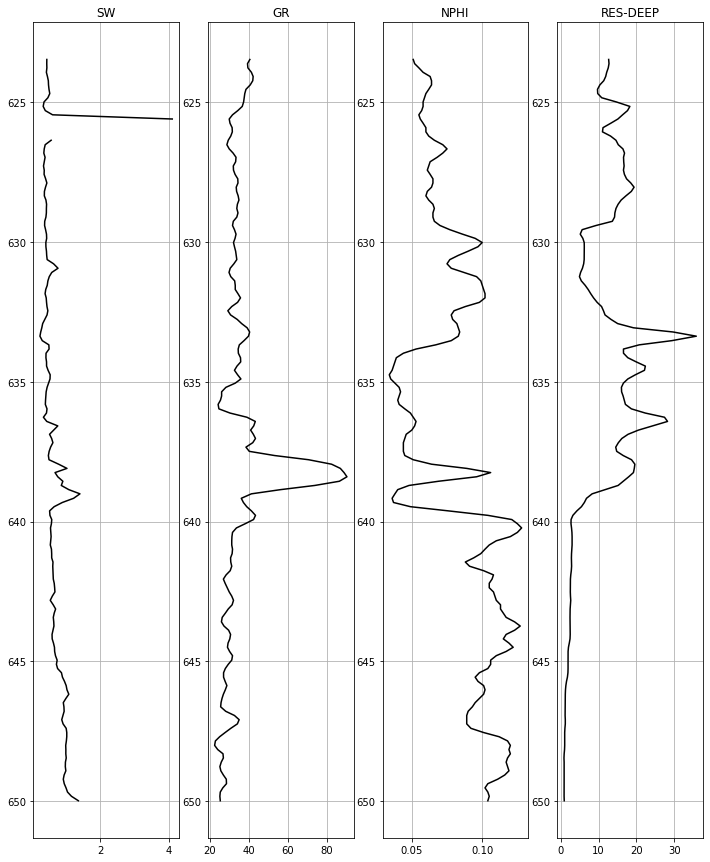

In [150]:
# Plotando para visualizar os perfis
#plt.figure(figsize = (2, 10))
#plt.plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax = plt.gca()


fig, ax = plt.subplots(1,4,figsize=(12,15))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()


In [151]:
# Como temos um problema com os dados ali no começo do perfil de saturação, foi identificado a localização de NaN e vamos retirar esses dados que são prejudiciais
dados1=dados1.iloc[21:176,:]
dados1 = dados1.reset_index(drop = True)

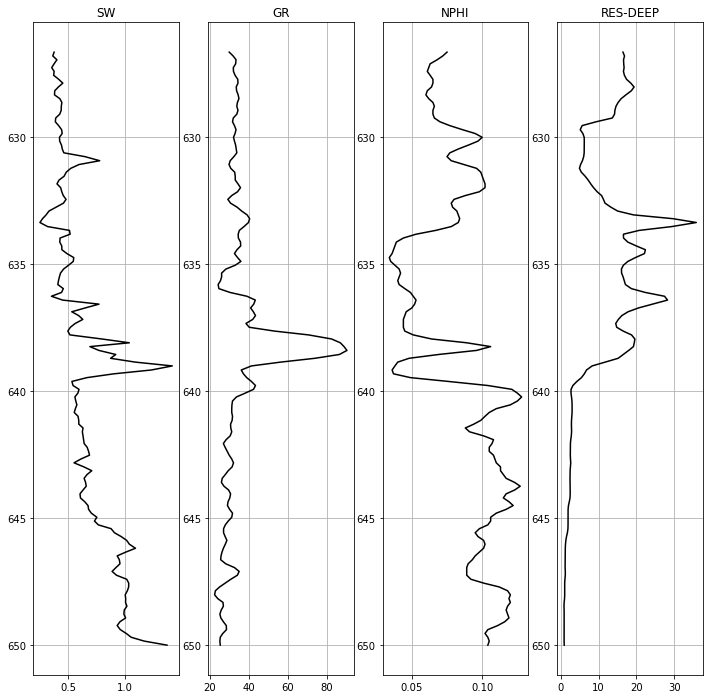

In [152]:
#Plotando para visualizar agora sem os dados corrompidos
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()

## Etapa 2: Criando modelo de regressão normal
> * Essa é a primeira tentativa de uso de regressão pelo tensorflow, sem muito processamento dos dados, feito somente para teste inicial.

In [153]:
# Importando tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [154]:
dados1.columns

Index(['DEPTH', 'GR', 'NPHI', 'RES-DEEP', 'SW'], dtype='object')

In [155]:
# Gerando os dados de entrada
x1 = dados1[['NPHI','RES-DEEP']]
y1 = dados1[['SW']]

# Como a resistividade está com valores muito acima da porosidade, temos que normalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x1[['NPHI','RES-DEEP']] = scaler.fit_transform(x1[['NPHI','RES-DEEP']])

<ipython-input-155-6b609ae78476>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[['NPHI','RES-DEEP']] = scaler.fit_transform(x1[['NPHI','RES-DEEP']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [156]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória os elementos dos
# dados 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [157]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

history1 = model1.fit(x1_train, y1_train,
                      epochs=1000, 
                      validation_data=(x1_test, y1_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
2/2 [==============================] - 0s 99ms/step - loss: 0.5172 - mae: 0.5172 - val_loss: 0.2039 - val_mae: 0.2039
Epoch 2/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2697 - mae: 0.2697 - val_loss: 0.3026 - val_mae: 0.3026
Epoch 3/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2850 - mae: 0.2850 - val_loss: 0.1943 - val_mae: 0.1943
Epoch 4/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1927 - mae: 0.1927 - val_loss: 0.2102 - val_mae: 0.2102
Epoch 5/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2382 - mae: 0.2382 - val_loss: 0.2260 - val_mae: 0.2260
Epoch 6/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2290 - mae: 0.2290 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 7/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1943 - mae: 0.1943 - val_loss: 0.1823 - val_mae: 0.1823
Epoch 8/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1962 - m

In [158]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [159]:
# Avaliando o modelo
model1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.0910 - mae: 0.0910


[0.09095072001218796, 0.09095072001218796]

Text(0, 0.5, 'Loss')

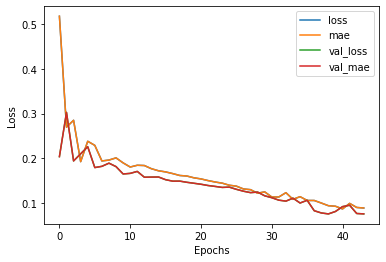

In [160]:
pd.DataFrame(history1.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [161]:
pred = model1.predict(x1)

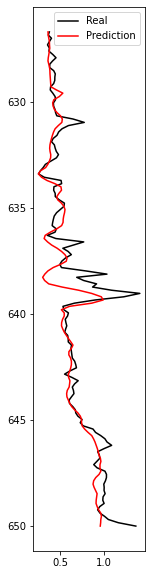

In [162]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(dados1['SW'], dados1['DEPTH'], color = 'k')
plt.plot(pred, dados1['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

## Aplicando o modelo em dados de teste
> * Para testar o dado treinado na rede de regressão, vamos usar os dados2, que são dados experimentais tirados em laboratório

In [163]:
# Inicialmente vamos ler os dados
dados2 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados2.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados2

,DEPTH,PHI,RES,SW
0,5456.1,0.0011,860.68518,6.1
1,5456.3,0.0008,677.43329,8.9
2,5458.5,0.0176,276.09280,10.6
3,5462.8,0.0091,439.26807,10.2
4,5465.4,0.0868,42.47038,23.2
5,5514.6,0.1521,77.73200,48.7
6,5517.8,0.1955,29.97581,9.0
7,5518.7,0.1674,33.86389,33.6
8,5519.2,0.1571,34.34479,6.8
9,5519.3,0.1483,75.46670,7.5


In [183]:
x2 = dados2[['PHI','RES']]
y2 = dados2[['SW']] / 100

x2[['RES']] = scaler.fit_transform(x2[['RES']])
x2[['PHI']] = scaler.fit_transform(x2[['PHI']])
#y2[['SW']] = scaler.fit_transform(y2[['SW']])

<ipython-input-183-562d6d1f744a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[['RES']] = scaler.fit_transform(x2[['RES']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [184]:
pred2 = model1.predict(x2)
pred2, y2

(array([[0.33557144],
        [0.41403663],
        [0.7148197 ],
        [0.51411796],
        [0.9738044 ],
        [0.5658053 ],
        [0.8890148 ],
        [0.9045637 ],
        [0.9184504 ],
        [0.5898769 ],
        [0.9244067 ],
        [0.8732609 ]], dtype=float32),
        SW
 0   0.061
 1   0.089
 2   0.106
 3   0.102
 4   0.232
 5   0.487
 6   0.090
 7   0.336
 8   0.068
 9   0.075
 10  0.445
 11  0.246)

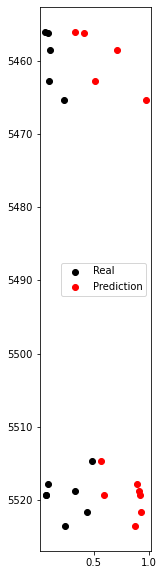

In [186]:
plt.figure(figsize = (2, 10))

plt.scatter(y2, dados2['DEPTH'], color = 'k')
plt.scatter(pred2, dados2['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()